In [1]:
#carregando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go 
import plotly.express as px

In [2]:
#Funções
def create_metadata(df):
    df_aux = pd.DataFrame(data={
    'colunas':df.columns,
    'missing':df.isna().sum(),
    'qtd':df.shape[0]
    })
    df_aux['tx_miss'] = round(df_aux['missing']/df_aux['qtd'],2)
    return df_aux

In [3]:
#carregando base de dados de mercado
df_market = pd.read_csv('../data/estaticos_market.csv')

In [4]:
idx = df_market.shape[0]
df_market['Empresa'] = [f'Empresa {i}' for i in np.arange(0,idx,1)]

In [5]:
#tamanho do dataframe
df_market = df_market.drop(['Unnamed: 0'],axis=1)
#df_market = df_market.set_index('id')
df_market.shape

(462298, 182)

## Análise Exploratória dos dados

### 1. Criação dataframe com metadados

In [6]:
#calcular missing values 
df_aux = pd.DataFrame(data={
    'colunas':df_market.columns,
    'tipos':df_market.dtypes,
    'missing':df_market.isna().sum(),
    'qtd':df_market.shape[0],
    'unicos':df_market.nunique(),
    'samples':[df_market[col].sort_values().head(5).values for col in df_market.columns]
})

In [7]:
#calcular taxa de missing values
df_aux['tx_miss'] = round(df_aux['missing']/df_aux['qtd'],2)

In [22]:
df_aux.to_csv('metadados.csv',index=False)

### 2. Exploração dos dados faltantes

In [8]:
#calculando % das variáveis acima de 15% de dados faltantes
tx_missing = np.arange(0.1,1.00,0.01)
total_missing = list()
for tx in tx_missing:
    total_missing = df_aux.query(f'tx_miss >= {tx}').shape[0]/df_aux.shape[0]
    print(f"Total de campos com dados >= {round(tx*100,2)}% faltantes- {df_aux.query(f'tx_miss >= {tx}').shape[0]}")
    print(f"Porcentagem de variáveis com >= {round(tx*100,2)}% de dados faltantes: {round(total_missing*100,2)}%")
    print('\n')

Total de campos com dados >= 10.0% faltantes- 144
Porcentagem de variáveis com >= 10.0% de dados faltantes: 79.12%


Total de campos com dados >= 11.0% faltantes- 143
Porcentagem de variáveis com >= 11.0% de dados faltantes: 78.57%


Total de campos com dados >= 12.0% faltantes- 143
Porcentagem de variáveis com >= 12.0% de dados faltantes: 78.57%


Total de campos com dados >= 13.0% faltantes- 143
Porcentagem de variáveis com >= 13.0% de dados faltantes: 78.57%


Total de campos com dados >= 14.0% faltantes- 141
Porcentagem de variáveis com >= 14.0% de dados faltantes: 77.47%


Total de campos com dados >= 15.0% faltantes- 141
Porcentagem de variáveis com >= 15.0% de dados faltantes: 77.47%


Total de campos com dados >= 16.0% faltantes- 141
Porcentagem de variáveis com >= 16.0% de dados faltantes: 77.47%


Total de campos com dados >= 17.0% faltantes- 141
Porcentagem de variáveis com >= 17.0% de dados faltantes: 77.47%


Total de campos com dados >= 18.0% faltantes- 141
Porcentagem de

### Pela observação, temos colunas com mais do que 99.5% de dados faltantes, desta forma faremos a remoção destas colunas antes do prosseguimento das análises

In [9]:
#Removendo colunas com valores acima de 99.5% de dados faltantes
df_market_droped = df_market.drop(list(df_aux.query(f'tx_miss >= {0.995}').colunas),axis=1)

### Conclusão:
- Dados faltantes são um desafio no dataset
- Uma exploração maior deve ser feita sobre os dados faltantes

### 2. Estudos para entender o comportamento das variáveis com dados faltantes
1. Entender o comportamento dos dados faltantes com base na variável _de_ramo_ 

#### 1. Comportamento dos dados faltantes com base na variável de_ramo

In [10]:
#criando vetor com os ramos de atividades
de_ramo = df_market_droped.de_ramo.unique()

In [11]:
#criando dataframe para receber os valores missing de cada categoria de_ramo
df_compare_missing = pd.DataFrame(data={'variaveis':df_market_droped.columns})

In [12]:
#criação do dataframe com os valores missing para cada váriavel da coluna de_ramo
for ramo in de_ramo:
    df_ramo = df_market_droped.query(f'de_ramo == "{ramo}"')
    df_aux = create_metadata(df_ramo)
    #df_aux.rename(columns={'tx_miss':ramo},inplace=True)
    df_compare_missing.insert(1,ramo,df_aux.tx_miss.values)
df_compare_missing

,variaveis,FARMACEUTICA,ORGANISMOS INTERNACIONAIS,INDUSTRIA AUTOMOTIVA,SERVICOS SOCIAIS,ATIVIDADES IMOBILIARIAS,SERVICOS DE SANEAMENTO BASICO,ELETROELETRONICOS,INDUSTRIAS EXTRATIVAS,ELETRICIDADE E GAS,...,INDUSTRIA DIGITAL,COMERCIO VAREJISTA,BENS DE CONSUMO,SERVICOS ADMINISTRATIVOS,QUIMICA-PETROQUIMICA,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVICOS DIVERSOS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVICOS DE ALOJAMENTO/ALIMENTACAO,INDUSTRIA DA CONSTRUCAO
0,id,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,fl_matriz,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,de_natureza_juridica,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,sg_uf,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,natureza_juridica_macro,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,tx_crescimento_12meses,0.91,0.89,0.69,0.83,0.80,0.74,0.69,0.73,0.80,...,0.82,0.83,0.83,0.79,0.71,0.86,0.95,0.83,0.83,0.85
165,tx_crescimento_24meses,0.86,0.89,0.69,0.82,0.79,0.74,0.68,0.73,0.79,...,0.82,0.83,0.83,0.79,0.71,0.86,0.95,0.83,0.83,0.85
166,tx_rotatividade,0.77,0.78,0.60,0.79,0.68,0.66,0.61,0.64,0.76,...,0.73,0.76,0.77,0.71,0.63,0.80,0.93,0.76,0.76,0.77
167,qt_filiais,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [13]:
#configurando o indice do dataframe para ser as variáveis
df_compare_missing.set_index('variaveis',inplace=True)

In [14]:
#Observando o desvio padrão entre o total de missing values entre as variáveis
df_compare_missing.T.std().describe()

count    169.000000
mean       0.129902
std        0.077460
min        0.000000
25%        0.064953
50%        0.164633
75%        0.211644
max        0.213099
dtype: float64

In [18]:
#grafico com a quantidade de valores nulos por coluna para cada categoria
fig = go.Figure()
config = {'responsive': True}
for col in df_compare_missing.columns:
    fig.add_trace(go.Scatter(x=df_compare_missing.index,y=df_compare_missing[col],mode='lines',name=col,marker=dict(line_width=0.01)))
fig.update_layout(
    autosize=False,
    width=1024,
    height=800
)
fig.show(config=config)

### Conclusão:
1. Olhando pela perspectiva das categorias da variável de_ramo, utiilzar uma técnica para dropar colunas com uma taxa X de dados faltantes poderia penalizar certos ramos de atividade, conforme pode ser observado no caso de serviços financeiros. 
2. Uma possível estratégia para desenvolvimento dos modelos, seria criar datasets separados por ramo de atividade, para rodar os modelos.

### Seleção de feature clusterizando missing values por ramo de atividade

In [15]:
from sklearn.feature_selection import SelectFromModel
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

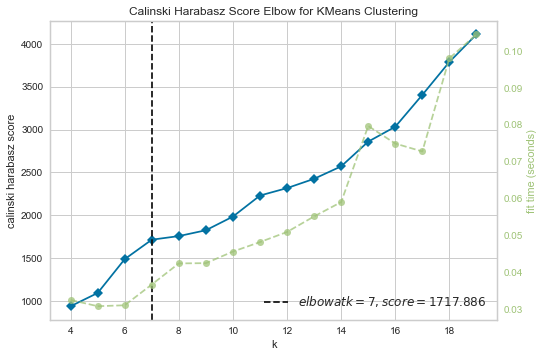

In [17]:
#avaliando melhor quantidade cluster para agruamento de valores nulos por ramo de atividade
model = KMeans(random_state=42)
elbow_view = KElbowVisualizer(model,k=(4,20),metric='calinski_harabasz')
elbow_view.fit(df_compare_missing)
elbow_view.show()

In [18]:
#Criando os clusters no dataframe
df_cluster = df_compare_missing.T
kmeans_7_clusters = KMeans(n_clusters=7,random_state=42)
kmeans_7_clusters.fit(df_compare_missing)
cluster = kmeans_7_clusters.predict(df_compare_missing)
df_compare_missing['cluster'] = cluster

In [44]:
#Seleção do cluster para testar o modelo
cluster5 = df_compare_missing.query('cluster == 5')
cluster1 = df_compare_missing.query('cluster == 1')
columns = cluster5.index.to_list() + cluster1.index.to_list()
len(columns)

43

In [45]:
#adicionando a coluna id
columns.append('id')

In [46]:
#criação do dataframe para testar o modelo
df_modelo = df_market[columns]
df_modelo = df_modelo.set_index('id')

In [47]:
#preprocessamento do dataframe
df_padrao_compare = pd.get_dummies(df_modelo)

In [146]:
#reset do index para voltar o id como coluna
df_padrao_compare = df_padrao_compare.reset_index()

In [29]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity
from sklearn.model_selection import train_test_split


In [126]:
#removendo nulos e criando o standard scaller
df_modelo = df_modelo.dropna()
std = StandardScaler()
df_modelo.shape

(417022, 265)

In [127]:
#importando dataframe de testes
prt_2 = pd.read_csv('../data/estaticos_portfolio2.csv')
prt_2 = prt_2.drop('Unnamed: 0',axis=1)
#df_test = df_test.set_index('id')
prt_2.head(5)

,id
0,09e95c1a84049001d086470a8f320a19b076f955a89122...
1,dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728...
2,16843c9ffb920170477118933798510d8d5f00f5c56c12...
3,ff045934d90aab184dd15e66daf3b3c97193bda5449298...
4,a0ce528caab2c62497a548d0ebd9e935143ef81ed7dbf0...


In [131]:
#criação do objeto para o modelo KNN
model_knn = NearestNeighbors(metric='cosine',algorithm='brute',n_neighbors=15,n_jobs=-1)


In [132]:
#fit nos dados de treino
model_knn.fit(df_std_train)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=15)

In [40]:
#função para calcular acurácia
def calculate_accuracy(ids_true, ids_pred):
    return len(set(ids_true) & set(ids_pred)) / len(set(ids_true))

In [148]:
#função para preparar os dados de teste
def prepare(df_test,df_population,standar_scaller):
    df_test = df_test[['id']]
    try:
        df_test = df_test.drop('Unnamed: 0',axis=1)
    except:
        print('Coluna não existe')
    #df_population = df_population[columns]
    df_test = df_test.merge(df_population,indicator=True,how='inner',on='id').drop('_merge',axis=1).dropna()
    
    df_test = df_test.set_index('id')
    df_test = pd.get_dummies(df_test)
    df_test = df_test.reset_index()
    df_test = df_test.dropna()
    df_test = df_test.drop('id',axis=1)
    df_test = standar_scaller.fit_transform(df_test)
    return df_test

In [169]:
#função para recomendar leads
def recommender(portfolio,mercado,modelo):
    distance, index = modelo.kneighbors(portfolio)
    distance = distance.flatten()
    index = index.flatten()
    recomendados = mercado.iloc[index]
    recomendados['distance'] = distance
    recomendados = recomendados.sort_values(by=['distance'],ascending=True)
    return recomendados['id']


In [83]:
calculate_accuracy(prt2_valid['id'],retorno)

0.011764705882352941

In [173]:
#importação de dados para teste
prt_1 = pd.read_csv('../data/estaticos_portfolio1.csv')
prt_1 = prt_1.drop('Unnamed: 0',axis=1)
#df_test = df_test.set_index('id')
prt1_train,prt1_valid = train_test_split(prt_1[['id']],test_size=0.3,random_state=423,shuffle=True)

In [174]:
#procesos de validação das recomendações
treino1 = prepare(prt1_train,df_padrao_compare,std)

Coluna não existe


In [175]:
#retorno de leads
retorno1 = recommender(treino1,df_market,model_knn)

In [176]:
#calculo da acuracia
calculate_accuracy(prt1_valid['id'],retorno1)

0.03592814371257485

## Conclusão
A abordagem utilizada, tomando os cluster com as colunas com menores quantidades de valores nulos, baseandos nos ramos de atividades não se mostrou uma boa opção para a recomendação de leads, atingindo uma precisão muito abaixo, desta forma tal abordagem será descartada.